In [80]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

# Задача 1: сравнение предложений

1. Скачайте файл с предложениями (sentences.txt).
1. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [9]:
with open('cat_sentences.txt') as f:
    content = f.readlines()
    
print(content)

['In comparison to dogs, cats have not undergone major changes during the domestication process.\n', 'As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\n', 'A common interactive use of cat for a single file is to output the content of a file to standard output.\n', 'Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.\n', 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n', 'The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.\n', 'Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\n', 'However, if the output is piped or redirected, cat is unnecessary.\n', 'cat with one named file is safer where human

In [11]:
sentences = [s.lower() for s in content]
sentences[:2]

['in comparison to dogs, cats have not undergone major changes during the domestication process.\n',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\n']

In [13]:
import re

In [15]:
tokesied_sentences = [re.split('[^a-z]', s) for s in sentences]
clean_sentences = [[t for t in s if t != ''] for s in tokesied_sentences]

In [17]:
clean_sentences[0]

['in',
 'comparison',
 'to',
 'dogs',
 'cats',
 'have',
 'not',
 'undergone',
 'major',
 'changes',
 'during',
 'the',
 'domestication',
 'process']

Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [23]:
words = set([w for s in clean_sentences for w in s])
w2i   = {w:i for i,w in enumerate(words)}
w2i['versions']

0

Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [40]:
n = len(clean_sentences)
d = len(w2i)

X = np.zeros((n, d))

for i, s in enumerate(clean_sentences):
    for w in s:
        j = w2i[w]
        X[i,j] += 1.
        
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [42]:
X.sum()

484.0

Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [49]:
from scipy.spatial.distance import cosine, cdist

In [64]:
dists = cdist(X[0].reshape(1, -1), X, metric='cosine')
dists

array([[0.        , 0.95275444, 0.86447381, 0.89517152, 0.77708871,
        0.94023857, 0.73273876, 0.92587507, 0.88427249, 0.90550888,
        0.83281654, 0.88047714, 0.83964325, 0.87035926, 0.87401184,
        0.94427218, 0.84063619, 0.9566445 , 0.94427218, 0.88854436,
        0.84275727, 0.82503645]])

In [63]:
dists.argsort()

array([[ 0,  6,  4, 21, 10, 12, 16, 20,  2, 13, 14, 11,  8, 19,  3,  9,
         7,  5, 15, 18,  1, 17]])

In [65]:
cosine(X[6], X[0]), cosine(X[4], X[0])

(0.7327387580875756, 0.7770887149698589)

In [67]:
sentences[0]

'in comparison to dogs, cats have not undergone major changes during the domestication process.\n'

In [66]:
sentences[6]

'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\n'

In [68]:
sentences[4]

'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n'

In [ ]:
cdist(X[0].reshape(1, -1), X).argmin

# Задача 2: аппроксимация функции

In [77]:
def f(x): return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)



In [ ]:
np.minu

In [103]:
def plot_fun(f, left, right):
    x = np.linspace(left, right, 250)
    y = np.array([f(x_) for x_ in x])

    plt.plot(x, y)
#     plt.xlim(left - 3, right + 3)
#     plt.ylim(np.min(y) - 1, np.max(y) + 1)

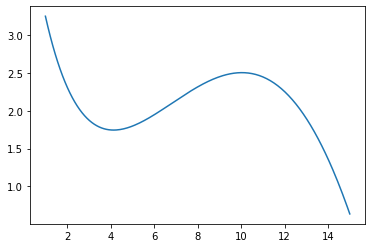

In [104]:
plot_fun(f, 1, 15)

In [79]:
A = np.array([[1, 1],
              [1, 15]])



In [83]:
sol = scipy.linalg.solve(A, np.array([f(1), f(15)]))
sol

array([ 3.43914511, -0.18692825])

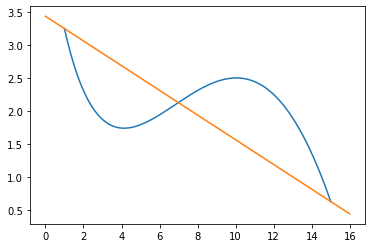

In [105]:
plt.plot(x, y)

sol_f = lambda x: sol[0] + sol[1]*x

plot_fun(sol_f, 0, 16)

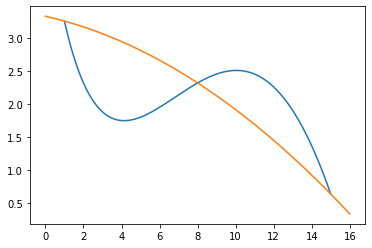

In [107]:
A = np.array([[1, 1, 1],
              [1, 8, 8**2],
              [1, 15, 15**2]])

sol = scipy.linalg.solve(A, np.array([f(1), f(8), f(15)]))

plt.plot(x, y)

sol_f = lambda x: sol[0] + sol[1]*x + sol[2]*x**2

plot_fun(sol_f, 0, 16)

array([ 3.32512949, -0.06531159, -0.00760104])

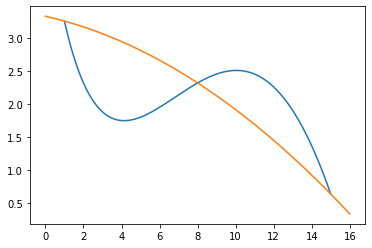

In [128]:
def approx_with_polynom(f, x_points):
    n = len(x_points)
    A = np.empty((n, n))
    
    for i, x_p in enumerate(x_points):
        row = np.empty((n,))

        for degree in range(n):
            row[degree] = x_p**degree
        
            
        A[i] = row
    b = np.array([f(x_p) for x_p in x_points])
    return scipy.linalg.solve(A, b)

def draw_approx(x_points):
    sol = approx_with_polynom(f, x_points)
    plt.plot(x, y)
    x_points = np.array(x_points)
    def sol_f(x):
        x_vec = [x**p for p in range(len(sol))]
        return x_vec@sol

    plot_fun(sol_f, 0, 16)
    return sol

draw_approx([1, 8, 15])

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


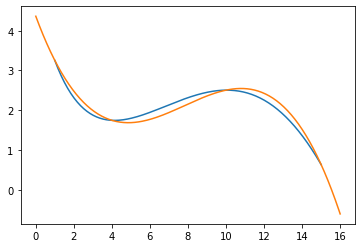

In [130]:
sol = draw_approx([1, 4, 10, 15])
print(sol)

[ 4.54829517e+00 -1.55853518e+00  2.79665785e-01 -1.75183327e-02
  3.09422718e-04]
[ 1  4 10 23 15]


array([ 4.54829517e+00, -1.55853518e+00,  2.79665785e-01, -1.75183327e-02,
        3.09422718e-04])

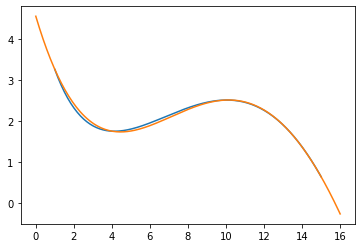

In [127]:
draw_approx([1, 4, 10, 23, 15])

In [117]:
approx_with_polynom(f, [1, 8, 15])@approx_with_polynom(f, [1, 8, 15])

11.06080953155432